#ややこしいデータ
間違え方の傾向やニューラルネットワークのSoftmax関数の数値からモデルがある種どれだけ自信を持って間違えたかが分かる。

#ライブラリのインポート
今回はややこしいデータを直感的に見たいため手書き数字のデータセットを使用する

In [ ]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

# データの読み込み

In [ ]:
data = load_digits()

In [ ]:
x = data.data
y = data.target

回帰分析のモデル化や決定木による予測ではないため最大最小正規化をする

In [ ]:
x = minmax_scale(x)
x

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

データの分割とモデルの初期化と学習を行なう

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model = MLP(hidden_layer_sizes=(500, 500, 100))
model.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(500, 500, 100))

学習したモデルから予測を行い、ソフトマックス関数の値も算出する

In [ ]:
y_pred = model.predict(x_test)
y_predSM = model.predict_proba(x_test)

混合行列の可視化

In [ ]:
import pandas as pd
df = pd.DataFrame(confusion_matrix(y_test, y_pred))
df.columns = data.target_names
df.index = data.target_names
df

,0,1,2,3,4,5,6,7,8,9
0,55,0,0,0,0,0,0,0,0,0
1,0,49,0,0,0,0,0,0,0,0
2,0,1,51,0,0,0,0,0,0,0
3,0,0,0,53,0,2,0,0,0,0
4,0,0,0,0,44,0,0,0,0,1
5,0,0,0,0,0,40,0,0,0,3
6,1,0,0,0,1,0,60,0,0,0
7,0,0,0,0,0,1,0,55,0,0
8,0,5,0,0,0,1,0,0,63,0
9,0,0,0,0,0,1,0,0,0,53


間違えたデータについてIDと正解データと予測値と確率を格納

In [ ]:
compli = []
for i in range(len(y_test)):
    if y_pred[i] != y_test[i]:
        compli.append([i, y_test[i], y_pred[i], max(y_predSM[i])])

In [ ]:
df_comp = pd.DataFrame(compli)
df_comp.columns = ["ID", "True", "Pred", "Proba"]
df_comp.sort_values("Proba", ascending=False).head()

,ID,True,Pred,Proba
1,22,5,9,0.999961
12,394,8,1,0.997154
9,280,8,1,0.994664
16,469,2,1,0.987341
5,199,8,1,0.984958


最も高い確率で間違えた(自信を持って間違えた)データを可視化

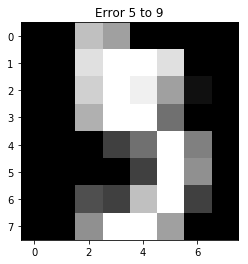

In [ ]:
import matplotlib.pyplot as plt
img = x_test[22].reshape(8, 8)
plt.imshow(img, cmap="gray")
plt.title("Error %s to %s"%(str(y_test[22]),str(y_pred[22])))
plt.show()

間違える傾向を探す

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       0.89      1.00      0.94        49
           2       1.00      0.98      0.99        52
           3       1.00      0.96      0.98        55
           4       0.98      0.98      0.98        45
           5       0.89      0.93      0.91        43
           6       1.00      0.97      0.98        62
           7       1.00      0.98      0.99        56
           8       1.00      0.91      0.95        69
           9       0.93      0.98      0.95        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



適合率は予測値に対して実測値がどのくらい当たっているかの指標である。

適合率(precision)に注目すると「1」「5」「9」が特に低いことが分かる。

ここで混合行列に注目すると「1」は「8」と間違えやすく、

「5」は特定の間違え方はしにくく間違え方が疎らになっている。

「9」は主に「5」と間違える傾向にあることが分かる。